### Motivation
In this notebook, we will focus on sentiment analysis of doctor reviews in German language. The motivation behind this study is to provide healthcare professionals with a tool to analyze patient feedback in a more efficient and effective way. By automating the sentiment analysis process, healthcare professionals can save time and resources and gain insights into patient satisfaction levels.

We will apply different different methods and discuss their pros and cons.


The Dataset


I downloaded the dataset and requirements.txt(all the libraries needed) for our case study







In [ ]:
!unzip /content/2023_03_Working_Student_Data_Science_Task_Data.zip

unzip:  cannot find or open /content/2023_03_Working_Student_Data_Science_Task_Data.zip, /content/2023_03_Working_Student_Data_Science_Task_Data.zip.zip or /content/2023_03_Working_Student_Data_Science_Task_Data.zip.ZIP.


In [ ]:
!pip install -r requirements.txt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 862.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.4/32.4 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2

 After unzipping you'll get a csv file.  
Before we open it, let's setup our notebook by loading all relevant modules and setting some options:

In [121]:
import re
import pickle
import sklearn
import pandas as pd
import numpy as np
import nltk 
from pathlib import Path
import seaborn as sns
#hv.extension("bokeh")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import roc_curve
import os
import random
import nltk
import re
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense
from tensorflow.keras.layers import Embedding, Flatten
from tensorflow.keras.layers import MaxPooling1D, Dropout, Activation, Conv1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn import metrics

import matplotlib.pyplot as plt
import warnings


pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

Now, we can take a look into the data:


In [47]:
# Read raw data
df_data = pd.read_csv('/content/reviews.csv',  delimiter=';',encoding='utf-8')
df_data.head(20)

,rating,comment
0,positive,Ich liebe Herrn Dr. Scheeser er nimmt dich immer Zeit für seine Patienten und ist sehr geduldig....
1,negative,Die Behandlungen von Dr. Brede dauern im Schnitt ca. 5-7 Minuten. Beschwerden werden nach meiner...
2,negative,Hilfe bei Zahnschmerzen. <br />\r\nNicht diesen Zahnarzt aufsuchen. Lediglich die Mitteilung sie...
3,negative,Ich bin unzufrieden und kann Frau Dr. Frankenberger nicht weiterempfehlen.
4,negative,"Der arzt ist okay,aber es ist für mich offensichtlich,dass er seine arbeit nicht außerordentlich..."
5,positive,Nach Prostata-OP sehe ich Herrn Klunder alle 3 Monate zur Hormonentzugstherapie.Er ist stets fre...
6,positive,"Er ist zwar recht hektisch und muss ein paar Mal auch plötzlich in andere Sprechzimmer, aber ich..."
7,positive,"Die telefonische Erreichbarkeit war für mich ein Problem. Terminbuchung, Erinnerung, Einhaltung,..."
8,positive,"Moderne Praxis, sehr gute Aufklärung. Dr. Dettmer nimmt sich viel Zeit, man fühlt sich gut aufge..."
9,positive,gründliches Vorgehen und stellen einer fundierten Diagnose<br />\r\ngute Beratung<br />\r\nnicht...


We'll focus on the comments and the ratings, which range from 0 to 1. The comments are mostly written in proper German using punctuation and don't include emojis. However, as with any real life text data there will be slang, grammatical mistakes, misspellings etc. Also, in some places we find html tags like <br />.  We will deal with all of that in the next step.

 ### Cleaning and pre processing




In [48]:
# Null values
print ("Null values in the dataset : ", df_data.isnull().sum(axis = 0))

Null values in the dataset :  rating     0
comment    0
dtype: int64


We don't have any null values !.

In [49]:
temp = df_data.groupby('rating').count()['comment'].reset_index().sort_values(by='comment',ascending=False)
temp.style.background_gradient(cmap='Purples')

,rating,comment
0,negative,10000
1,positive,10000


<Axes: xlabel='rating', ylabel='count'>

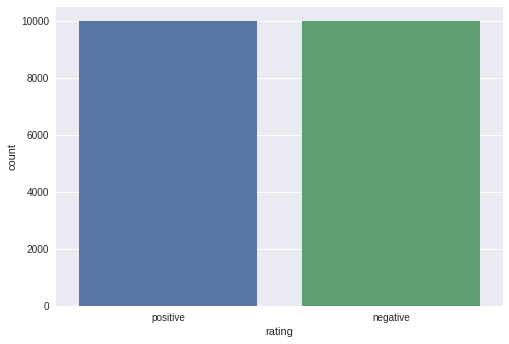

In [50]:
sns.countplot(data=df_data, x = 'rating')


We have balanced data!.

In [51]:
nltk.download('punkt')
nltk.download('stopwords')

stemmer = SnowballStemmer("german")
stop_words = set(stopwords.words("german"))

def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The `clean_text` function takes a string input and applies a bunch of manipulations to it (described in the code). Check out this example:

In [52]:
clean_text("Ich habe mich für eine Werkstudentenstelle im Bereich Datenwissenschaft beworben.")


'werkstudentenstell bereich datenwissenschaft beworb'

There are advantages to implementing this function. Eliminating insignificant characters and words shrinks the amount of data, which can lead to better prediction results by decreasing the amount of noise in the data. This is because certain words, such as prepositions and punctuation, are not helpful for extracting additional information, particularly when using basic models. By reducing words to their root form and converting them to lowercase, we ensure that comparable words are processed uniformly. As a result, we can enhance model performance by increasing the number of meaningful data points. Let's utilize this approach on our data.

In [53]:
df_data["comment_clean"] = df_data["comment"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

In [54]:
df_data.head(50)

,rating,comment,comment_clean
0,positive,Ich liebe Herrn Dr. Scheeser er nimmt dich immer Zeit für seine Patienten und ist sehr geduldig....,lieb herrn dr schees nimmt imm zeit patient geduld sprechstundenhilf total lieb empfehl
1,negative,Die Behandlungen von Dr. Brede dauern im Schnitt ca. 5-7 Minuten. Beschwerden werden nach meiner...,behandl dr bred dau schnitt ca minut beschwerd erfahr ernst genomm art unverbind kuhl
2,negative,Hilfe bei Zahnschmerzen. <br />\r\nNicht diesen Zahnarzt aufsuchen. Lediglich die Mitteilung sie...,hilf zahnschmerz zahnarzt aufsuch ledig mitteil jahr besuch trotz hinweis wart schlecht servic j...
3,negative,Ich bin unzufrieden und kann Frau Dr. Frankenberger nicht weiterempfehlen.,unzufried frau dr frankenberg weiterempfehl
4,negative,"Der arzt ist okay,aber es ist für mich offensichtlich,dass er seine arbeit nicht außerordentlich...",arzt okay offensicht arbeit ausserordent mag
5,positive,Nach Prostata-OP sehe ich Herrn Klunder alle 3 Monate zur Hormonentzugstherapie.Er ist stets fre...,prostata op seh herrn klund monat hormonentzugstherapi stet freundlich humorvoll sympath halt ko...
6,positive,"Er ist zwar recht hektisch und muss ein paar Mal auch plötzlich in andere Sprechzimmer, aber ich...",recht hektisch paar mal plotzlich sprechzimm verletz kam imm gut klar
7,positive,"Die telefonische Erreichbarkeit war für mich ein Problem. Terminbuchung, Erinnerung, Einhaltung,...",telefon erreichbar probl terminbuch erinner einhalt gerung wartezeit gut sympat nett arzt gern
8,positive,"Moderne Praxis, sehr gute Aufklärung. Dr. Dettmer nimmt sich viel Zeit, man fühlt sich gut aufge...",modern praxis gut aufklar dr dettm nimmt zeit fuhlt gut aufgehob empfehl
9,positive,gründliches Vorgehen und stellen einer fundierten Diagnose<br />\r\ngute Beratung<br />\r\nnicht...,grundlich vorgeh stell fundiert diagnos gut berat gleich op nutzung krankengymnast heilung vorbeug


In [55]:
# Create binary grade, class 1-2 or 5-6  = good or bad
df_data["grade"] = 0
df_data.loc[df_data["rating"] == 'positive', "grade"] = 1
df_data.loc[df_data["rating"] == 'negative', "grade"] = 0

For our classification task, we should convert categorical features into numerical features.

In [56]:
df_data.head()

,rating,comment,comment_clean,grade
0,positive,Ich liebe Herrn Dr. Scheeser er nimmt dich immer Zeit für seine Patienten und ist sehr geduldig....,lieb herrn dr schees nimmt imm zeit patient geduld sprechstundenhilf total lieb empfehl,1
1,negative,Die Behandlungen von Dr. Brede dauern im Schnitt ca. 5-7 Minuten. Beschwerden werden nach meiner...,behandl dr bred dau schnitt ca minut beschwerd erfahr ernst genomm art unverbind kuhl,0
2,negative,Hilfe bei Zahnschmerzen. <br />\r\nNicht diesen Zahnarzt aufsuchen. Lediglich die Mitteilung sie...,hilf zahnschmerz zahnarzt aufsuch ledig mitteil jahr besuch trotz hinweis wart schlecht servic j...,0
3,negative,Ich bin unzufrieden und kann Frau Dr. Frankenberger nicht weiterempfehlen.,unzufried frau dr frankenberg weiterempfehl,0
4,negative,"Der arzt ist okay,aber es ist für mich offensichtlich,dass er seine arbeit nicht außerordentlich...",arzt okay offensicht arbeit ausserordent mag,0


In [57]:
# Drop when any of x missing
df_data = df_data[(df_data["comment_clean"] != "") & (df_data["comment_clean"] != "null")]

df_data = df_data.dropna(
    axis="index", subset=["grade", "comment", "comment_clean"]
).reset_index(drop=True)

In [58]:
df_clean = df_data.copy()

In [59]:
df_clean.head()

,rating,comment,comment_clean,grade
0,positive,Ich liebe Herrn Dr. Scheeser er nimmt dich immer Zeit für seine Patienten und ist sehr geduldig....,lieb herrn dr schees nimmt imm zeit patient geduld sprechstundenhilf total lieb empfehl,1
1,negative,Die Behandlungen von Dr. Brede dauern im Schnitt ca. 5-7 Minuten. Beschwerden werden nach meiner...,behandl dr bred dau schnitt ca minut beschwerd erfahr ernst genomm art unverbind kuhl,0
2,negative,Hilfe bei Zahnschmerzen. <br />\r\nNicht diesen Zahnarzt aufsuchen. Lediglich die Mitteilung sie...,hilf zahnschmerz zahnarzt aufsuch ledig mitteil jahr besuch trotz hinweis wart schlecht servic j...,0
3,negative,Ich bin unzufrieden und kann Frau Dr. Frankenberger nicht weiterempfehlen.,unzufried frau dr frankenberg weiterempfehl,0
4,negative,"Der arzt ist okay,aber es ist für mich offensichtlich,dass er seine arbeit nicht außerordentlich...",arzt okay offensicht arbeit ausserordent mag,0


In [60]:
from bokeh.models import NumeralTickFormatter
import matplotlib.pyplot as plt
# Word Frequency of most common words
word_freq = pd.Series(" ".join(df_clean["comment_clean"]).split()).value_counts()
word_freq.head()

arzt          5195
gut           4542
dr            3662
freundlich    3329
zeit          3260
dtype: int64

In [61]:
from collections import Counter
df_clean['temp_list'] = df_clean['comment_clean'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_clean['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,arzt,5195
1,gut,4542
2,dr,3662
3,freundlich,3329
4,zeit,3260
5,praxis,3246
6,behandl,2968
7,patient,2893
8,unfreund,2635
9,kompetent,2633


<Axes: xlabel='grade', ylabel='count'>

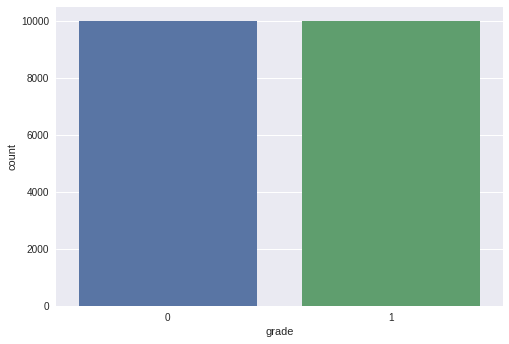

In [62]:
sns.countplot(data=df_clean, x = 'grade')

In [63]:
df_positive = df_clean[df_clean['rating']=='positive']
df_negative = df_clean[df_clean['rating']=='negative']

**Most frequent words in positive comments**



In [64]:
df_positive['temp_list_positive'] = df_positive['comment_clean'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_positive['temp_list_positive'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

<ipython-input-64-583eca23ebce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['temp_list_positive'] = df_positive['comment_clean'].apply(lambda x:str(x).split())


,Common_words,count
0,gut,3877
1,freundlich,2880
2,dr,2663
3,kompetent,2398
4,arzt,2287
5,zeit,1986
6,praxis,1942
7,behandl,1746
8,nett,1586
9,imm,1503


**Most frequent words in negative comments**

In [65]:
df_negative['temp_list_negative'] = df_negative['comment_clean'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_negative['temp_list_negative'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

<ipython-input-65-3bf886b2c98c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['temp_list_negative'] = df_negative['comment_clean'].apply(lambda x:str(x).split())


,Common_words,count
0,arzt,2908
1,unfreund,2449
2,patient,1712
3,wurd,1419
4,arztin,1305
5,praxis,1304
6,zeit,1274
7,nie,1247
8,behandl,1222
9,termin,1214


Using the most frequent words, we can identify additional candidates for our stop word list in the pre-processing step. For example "doctor" (arzt) and "miss" (frau) are very common but probably won't help our algorithm to differentiate between sentiments. In contrast, words like "good" (gut) and "competent" (kompetent) are not only frequent but also carry a strong sentiment. They will be crucial for the performance of our model.

### Feature creation with TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a commonly used technique for sentiment analysis, which involves analyzing the emotions and opinions expressed in text data. Sentiment analysis using TF-IDF involves calculating a numerical weight for each word in a text document, based on how frequently it appears in the document and how important it is in the context of the entire corpus of documents.

In sentiment analysis, TF-IDF is often used to identify the most important words in a text document that contribute to the overall sentiment expressed. By weighting the importance of each word based on its frequency in the document and its relevance to the entire corpus, TF-IDF can help to identify key indicators of positive or negative sentiment.

In [66]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=30%) words
use pairs of two words (ngram)
"""
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)
vectorizer.fit(df_clean["comment_clean"])

TfidfVectorizer(max_df=0.3, min_df=10, ngram_range=(1, 2))

In [67]:
# Vector representation of vocabulary
word_vector = pd.Series(vectorizer.vocabulary_).sample(8, random_state=1)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 umzug                3316
absolut kompetent      34
spitz                3014
ding                  796
dabei                 714
zeitpunkt            3891
fehldiagnos          1114
funf minut           1263
dtype: int64


We still have additional candidates for our stop word list such as funf minut, dabei and ding.

### Modeling

To test the classification performance of our model, we will perform a cross validation. For that, we split our data into a training and a testing set. The former is used to train the model and the latter to evaluate its predictions:

In [68]:
# Sample data - 25% of data to test set
train, test = train_test_split(df_clean, random_state=1, test_size=0.25, shuffle=True)

X_train = train["comment_clean"]
Y_train = train["grade"]
X_test = test["comment_clean"]
Y_test = test["grade"]
print(X_train.shape)
print(X_test.shape)

(14997,)
(5000,)


In [69]:
# transform each sentence to numeric vector with tf-idf value as elements
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec.get_shape()

(14997, 3974)

The training set consists of more than 14k rows and the testing will be performed on more than 3k observations. Now, that we have split our data we can transform the text data into its `TF-IDF` representation:

In [70]:
# Compare original comment text with its numeric vector representation
print(f"Original sentence:\n{X_train[1:2].values}\n")
# Feature Matrix
features = pd.DataFrame(
    X_train_vec[1:2].toarray(), columns=vectorizer.get_feature_names_out() 
)
nonempty_feat = features.loc[:, (features != 0).any(axis=0)]
print(f"Vector representation of sentence:\n {nonempty_feat}")

Original sentence:
['professionell kompetent arzt erfahr team praxisatmospar ebenfall sup']

Vector representation of sentence:
        arzt  arzt erfahr  ebenfall    erfahr  kompetent  kompetent arzt  \
0  0.140687     0.469541  0.370838  0.274674   0.174224        0.298868   

   professionell  professionell kompetent       sup     team  
0       0.304367                 0.473494  0.237101  0.23247  


**For** this eight word sentence, the vector of length 3974 contains mostly zeros. However, the indices representing the used words / ngrams are non empty. They include the value that `TF-IDF` assigned to them. In this particular case, "professionell kompetent"  has the largest weight meaning that it is relatively frequent in our sentence while not being very common in other sentences of our dataset.

Now, that we have prepared our features, we can start to train and evaluate models. For a binary classification task there are many options to [choose from in `scikit-learn`](https://scikit-learn.org/stable/supervised_learning.html). We will focus on the ones that are most promising. In my experience they are: Logistic Regression, Support Vector Classification (SVC), Ensemble Methods (Boosting, Random Forest) and Neural Networks (i.e. Multi Layer Perceptron or MLP in sklearn). We will compare these models and chose the most promising one:

In [71]:
# models to test
classifiers = [
    LogisticRegression(solver="sag", random_state=1),
    LinearSVC(random_state=1),
    RandomForestClassifier(random_state=1),
    XGBClassifier(random_state=1),
    MLPClassifier(
        random_state=1,
        solver="adam",
        hidden_layer_sizes=(12, 12, 12),
        activation="relu",
        early_stopping=True,
        n_iter_no_change=1,
    ),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier', 'XGBClassifier', 'MLPClassifier']


In [72]:
%%time
import time
# test all classifiers and save pred. results on test data
results = {}
ROC={}

for name, clf in zip(names, classifiers):
    # Get the start time
    start_time = time.time()
    print(f"Training classifier: {name}")
    clf.fit(X_train_vec, Y_train)
    # Get the end time
    end_time = time.time()
    # Calculate the elapsed time in seconds
    elapsed_time = end_time - start_time
    # Print the elapsed time in seconds
    print("Elapsed time (s):", elapsed_time)
    prediction = clf.predict(X_test_vec)
    report = sklearn.metrics.classification_report(Y_test, prediction)
    fpr, tpr, thresh = sklearn.metrics.roc_curve(Y_test, prediction, pos_label=1)
    ROC[name]=fpr, tpr, thresh 
    results[name] = report

Training classifier: LogisticRegression
Elapsed time (s): 0.08172011375427246
Training classifier: LinearSVC
Elapsed time (s): 0.04894232749938965
Training classifier: RandomForestClassifier
Elapsed time (s): 11.810861349105835
Training classifier: XGBClassifier
Elapsed time (s): 7.454621315002441
Training classifier: MLPClassifier
Elapsed time (s): 0.991823673248291
CPU times: user 24.6 s, sys: 870 ms, total: 25.5 s
Wall time: 20.7 s


<ipython-input-73-c61d6f80b2d4>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


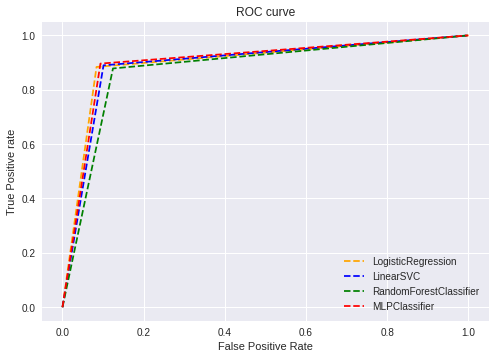

In [73]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# Create a new figure
plt.figure()
# plot roc curves
plt.plot(ROC['LogisticRegression' ][0], ROC['LogisticRegression' ][1], linestyle='--',color='orange', label='LogisticRegression' )
plt.plot(ROC['LinearSVC' ][0], ROC['LinearSVC' ][1], linestyle='--',color='blue', label='LinearSVC' )
plt.plot(ROC['RandomForestClassifier' ][0], ROC['RandomForestClassifier' ][1], linestyle='--',color='green', label='RandomForestClassifier' )
plt.plot(ROC['MLPClassifier' ][0], ROC['MLPClassifier' ][1], linestyle='--',color='red', label='MLPClassifier' )
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=600)
plt.show();

In [74]:
# Prediction results
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2492
           1       0.91      0.88      0.90      2508

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000


Results for LinearSVC:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2492
           1       0.90      0.89      0.89      2508

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000


Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2492
           1       0.88      0.88      0.88      2508

    accuracy                           0.88      5000
   macro avg       0.88      0.88  

The output of sci-kit's `classification_report` provides us with several metrics.
All methods achieve impressive results predicting the good ratings class with `f1-scores` above 0.85. Furthermore, results for the bad ratings class are also the same.

Training LogisticRegression and LinearSVC was very fast while the remaining classifiers were significantly slower. This has to do with their higher model complexity but can also greatly vary depending on the parameters used. 

The speed of the model is a significant parameter as all of them have comparable performance.


### Parameter tuning

We've learned that LogisticRegression is a solid model and fast choice and delivers great results out of the box. Still, we might be able to improve upon those by taking a more guided approach to choosing parameters. To do so, we will compare different parameters for feature creation as well as modeling. We can achieve this by making use of the pipeline and grid search functionality in sci-kit learn.  



In [75]:
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("LR", LogisticRegression())])

# define parameter space to test # runtime 35min
params = {
    "tfidf__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "tfidf__max_df": np.arange(0.3, 0.8, 0.2),
    "tfidf__min_df": np.arange(5, 100, 45),
}
pipe_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="f1_macro")
pipe_clf.fit(X_train, Y_train)
pickle.dump(pipe_clf, open("./clf_pipe.pck", "wb"))

In [31]:
print(pipe_clf.best_params_)


{'tfidf__max_df': 0.3, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 3)}


In [76]:
%%time
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("LR", LogisticRegression())])

# define parameter space to test # runtime 19min
params = {
    "tfidf__ngram_range": [(1, 3)],
    "tfidf__max_df": [0.3],
    "tfidf__min_df": [5],
}
pipe_lr_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="f1_macro")
pipe_lr_clf.fit(X_train, Y_train)
pickle.dump(pipe_lr_clf, open("./pipe_svc_clf.pck", "wb"))

CPU times: user 946 ms, sys: 43.2 ms, total: 989 ms
Wall time: 3.81 s


Now, using this best parameters for `TF-IDF` we can search for optimal parameters for the LogisticRegression:

In [77]:
best_params = pipe_lr_clf.best_params_
print(best_params)

{'tfidf__max_df': 0.3, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 3)}


In [78]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X_train, Y_train)
pipe_pred = pipe.predict(X_test)
report = sklearn.metrics.classification_report(Y_test, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2492
           1       0.91      0.88      0.90      2508

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



Using parameter tuning we have slightly keep the same performance of Logistic regression.

Prediction
Now, that we have our best performing model (so far) we can use it to make predictions. One possible application is to find contradictory reviews, i.e. reviews where the sentiment of the comment doesn't match the rating. For that, we look at cases where our model makes a prediction with high confidence which doesn't match the original rating:

In [111]:
# Get confidence score for prediction
conf_score = pipe.decision_function(X_test)
# Get the Nth highest / lowest score
# high score indicates class 1 (good), low score 0 (bad)
score_pos = np.sort(conf_score)[-400]
score_neg = np.sort(conf_score)[2000]
print(
    f"Threshold for negative rating: {score_neg}\nThreshold for positive rating: {score_pos}"
)

Threshold for negative rating: -0.9541722939697506
Threshold for positive rating: 3.7346216034241513


In [113]:
pd.options.display.max_colwidth = 800
# Predicted bad but rated good
test[["grade", "comment"]][(Y_test != pipe_pred) & (conf_score <= score_neg)]

,grade,comment
3674,1,Die Ärztin war freundlich und sorgfältig. Ich hatte kein schlechtes Gefühl in der Praxis so wie die anderen Patienten es beschreiben.
5055,1,"Nach längerer Zeit musste ich zur Behandlung und wurde nicht enttäuscht. So stellt man sich wirklich eine Ärztin vor, ohne ""Bauchschmerzen"" vorher zu haben. Einen kurzfristigen Termin bekam ich, war natürlich nicht die einzige Patientin."
8797,1,"Nach langer Suche kam ich zu Fr. Dr. Buttgereit. Sie hat nicht nur die richtige Diagnose gestellt, sondern mich auch dementsprechend behandelt. Nachdem ich 3 Wochen im Krankenhaus war, behandelte sie mich noch einige Monate weiter. Sie hat mein volles Vertauen."
9909,1,"Frau Doktor Kreyer ist sehr nett und wirkt sehr kompeten aber Sie sollte sich dringenst eine neue Arztschwester suchen. So etwas unfreundliches hab ich noch nicht erlebt. Da kann die Ärztin noch so kompetent sein, wenn der erste Kontakt zur Praxis so kalt und desinteressiert ist."
343,1,Die Sauberkeit in der Praxis und Behandlungsräumen ist verbesserungswürdig
5498,1,Die Sprechstundenhilfe ist bei telefonischer Terminabsprache absolut arrogant und unfreundlich.
10804,1,"Meine Untersuchung und das Vorgespräch wurden ohne unangenehme Nebenwirkungen durchgeführt, wer lässt sich schon gern ...... es sei denn jemand anderes steht darauf :-)<br />\nMfG"
4691,1,"Hier steht nicht der wirtschaftliche Erfolg des Arztes, sonder der Behandlungserfolg des Patienten an 1. Stelle!"
9532,1,"Routinierte und erfahrene Praxis auch oder besonders für Kinder. Arzt operiert bei entsprechender Diagnose auch selbst, so ist alles in einer Hand."
19754,1,"Ich kann mich den positiven Äußerungen meiner Vorredner nur anschließen. Allerdings behandelt die Praxis keine Kassenpatienten bzw. diese müssen die Rechnung selber bezahlen. Ist vielleicht ein nicht ganz unwichtiges Detail, zumal hier angegeben ist das Kassenpatienten behandelt werden."


In [117]:
# Predicted good but rated bad
test[["grade", "comment"]][(Y_test != pipe_pred) & ((conf_score >= score_pos))]

,grade,comment
19024,0,"Eigentlich bin ich immer bei Frau Dr.med. Wolff, war aber auch schon bei beiden Ärzten. Ich finde sie beide super nett und kompetent. Sie sagen mir genau was ich habe und erklären es mir immer gut. Die Mädels am Empfang waren auch immer sehr nett. Ich fühle mich sehr gut aufgehoben. Danke!"
2702,0,"Bin durch Zufall vor 2, 5 Jahren in die Praxis gekommen. Ich wurde und werde sehr gut betreut .<br />\nSehr gute Diagnostik, es gibt kein Diskusion bei Verordnungen wegen Budgetüberschreitung und Diagnosen werden gut erklärt.<br />\nDas gesamte Praxisteam ist sehr nett und freundlich."
2319,0,Er ist nicht nett und ihre Team auch
16818,0,Sehr guter Artz super praxis nette mit arbetarin nur voll dankschön von ganzem Herzen


Our model is really good at classifying the positive class. It's able to correctly recognize that most comments above are positive even though they have a negative rating.However, it makes some mistakes in predicting the negative class.

**As** a last test of our model's performance, let's see how it copes with data that was never seen before. For that, we use some new comments as input. Then, we apply the same pre processing and cleaning as in our model preparation. Finally, we convert the text to its numeric representations and feed it to our model for the binary prediction:

In [118]:
# Get new comments from website that were not included in original data
INPUT = [
    "Super sympathische Ärztin, fühle mich bei ihr bestens aufgehoben."
    "Sprechstundenhilfe war super nett man fühlt sich wohl.",
    "Frau Doktor Merz nimmt sich richtig Zeit für mich. Hilft wo sie kann."
    "Hört wirklich einen zu. Sehr nett und freundlich. Sie ist sehr kompetent,"
    "zuverlässig und vertrauenswürdig.",
    "Nach meiner Beobachtung hat diese Praxis eine schlechte Hygiene. ",
    "Mangels akriebischer Behandlung musste mehrmals nachgebessert werden.",
]

In [119]:
# Pre-Process comments as we did with train data
text = [clean_text(comment) for comment in INPUT]
text_out = " \n".join(text)
print(f"Input after pre-processing / cleaning:\n\n{text_out}")
# run comments through pipe: predict using our best model from above
predictions = pipe.predict(text)

Input after pre-processing / cleaning:

sup sympath arztin fuhl best aufgehob sprechstundenhilf sup nett fuhlt wohl 
frau doktor merz nimmt richtig zeit hilft hort wirklich nett freundlich kompetent zuverlass vertrauenswurd 
beobacht praxis schlecht hygi 
mangel akrieb behandl mehrmal nachgebessert


In [120]:
# Show comment and predicted Labels
predictions = pd.Series(predictions)
predictions = predictions.replace(0, "bad").replace(1, "good")

pd.concat(
    [pd.Series(INPUT), predictions], axis="columns", keys=["comment", "prediction"]
)

,comment,prediction
0,"Super sympathische Ärztin, fühle mich bei ihr bestens aufgehoben.Sprechstundenhilfe war super nett man fühlt sich wohl.",good
1,"Frau Doktor Merz nimmt sich richtig Zeit für mich. Hilft wo sie kann.Hört wirklich einen zu. Sehr nett und freundlich. Sie ist sehr kompetent,zuverlässig und vertrauenswürdig.",good
2,Nach meiner Beobachtung hat diese Praxis eine schlechte Hygiene.,bad
3,Mangels akriebischer Behandlung musste mehrmals nachgebessert werden.,bad


The result is very promising. Our model correctly classifies the first two comments as positive and the last two as negative. We can conclude that our predictions are pretty accurate even when dealing with unknown data!.

In [122]:
# Needed on Google Colab
if os.environ.get('COLAB_GPU', False):
    !pip install -U holoviews hvplot panel==0.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.4/32.4 MB 47.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 98.7 MB/s e

While the first part heavily relied on scikit-learn, here we will use Tensorflow and more specifically Keras for implementing our model. Neural Networks are much more computationally demanding compared to other machine-learning methods

Executing this on Colab will make sure that our model runs on a TPU if available and falls back to GPU / CPU otherwise:

In [123]:
# Try to run on TPU
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()
print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


Here we set the parameters that we will use for embedding and the neural network. The batch size will depend on the number of available cores.

In [125]:
# Text Vectors
MAX_FEATURES = 30000
EMBED_DIM = 100
MAXLEN = 400

# Convolution
KERNEL_SIZE = 5
FILTERS = 64
POOL_SIZE = 4

# LSTM
LSTM_OUTPUT_SIZE = 100

# Training
BATCH_SIZE = 32 * strategy.num_replicas_in_sync
EPOCHS = 10

### Feature Creation

When dealing with text data, we need to convert text to a numeric representation first. For that, we use the `Tokenizer` function in Keras. After splitting the text into tokens (i.e. words or punctuation) the function assigns each unique token a number, i.e. it builds a token <-> integer dictionary. Using this, each comment is transformed to a vector of integers in which each element represents a token. Here, we also transform all tokens to lowercase and limit the maximum number of used unique tokens to `MAX_FEATURES`:

In [126]:
%%time
# create numerical vector representation of comments
# comment to list of indices representing words in dict
tokenizer = Tokenizer(lower=True, split=" ", num_words=MAX_FEATURES)
tokenizer.fit_on_texts(X_train)
X_train_vec = tokenizer.texts_to_sequences(X_train)
X_test_vec = tokenizer.texts_to_sequences(X_test)
MAXLEN = max([len(x) for x in X_train_vec])
print(f"Max vector length: {MAXLEN}")

Max vector length: 40
CPU times: user 488 ms, sys: 11 ms, total: 499 ms
Wall time: 501 ms


Next, we make sure that our vectors have a fixed length equal to the maximal comment length. Shorter vectors will be padded with zeros:

In [127]:
# pad with zeros for same vector length
X_train_vec = sequence.pad_sequences(X_train_vec, maxlen=MAXLEN, padding="post")
X_test_vec = sequence.pad_sequences(X_test_vec, maxlen=MAXLEN, padding="post")

Now, we take a look at the results of the transformation:


In [128]:
tmp = train[0:1].copy()
tmp["vector"] = list(X_train_vec[0:1])
tmp

,rating,comment,comment_clean,grade,temp_list,vector
1566,negative,Obwohl mir von ihr abgeraten wurde bin ich aus der Not dennoch zu ihr. Letztlich wurden meine Sy...,obwohl abgerat wurd not dennoch letztlich wurd symptom aug gegoogelt dabei normal gerstenkorn sc...,0,"[obwohl, abgerat, wurd, not, dennoch, letztlich, wurd, symptom, aug, gegoogelt, dabei, normal, g...","[100, 2665, 13, 435, 591, 1996, 13, 397, 225, 4556, 260, 421, 2174, 1444, 13, 118, 1852, 108, 0,..."


In [129]:
print(
    f"The comment is transformed to a vector whose first element is \"{tmp['vector'].iloc[0][0]}\". This integer translates to: \"{tokenizer.index_word[tmp['vector'].iloc[0][0]]}\" which is the token representing the original word."
)

The comment is transformed to a vector whose first element is "100". This integer translates to: "obwohl" which is the token representing the original word.


### Defining the predictive model


We start by defining our neural network layer by layer. First, we use an [embedding layer](https://keras.io/api/layers/core_layers/embedding/). Its aim is to learn a dense vector representation for each token which maximizes the objective function of the network. 
On top of the embedding layer we stack a dropout layer. This is supposed to reduce overfitting by randomly dropping nodes of the network while training.  
Next, we add a [convolutional layer](http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/). This might sound familiar from an image recognition context but has also found its way into NLP. By passing filters over it, this layer calculates a higher dimensionality of the data. Doing this, it can detect the most prominent patterns in the data while reducing the computational demand.  
The pooling layer further reduces the dimensionality of the data and helps extract the most dominant patterns. Its side effect is that it helps with overfitting as well.  
Next, we add the [Long Short Term Memory (LSTM) layer](https://colah.github.io/posts/2015-08-Understanding-LSTMs/). LSTM is a form of Recurrent Neural Network (RNN). RNNs have been terrfic in solving all kinds of problems by adding the ability to persist information over longer input sequences to traditional networks. Thus, they can take context into consideration which beautifully fits the demands of text understanding. In addition to that, LSTMs enable models to even take long term dependencies into account. 


In [130]:
# Define NN architecture
print(MAXLEN)
print(EMBED_DIM)
with strategy.scope():
    model = Sequential()
    model.add(
        Embedding(input_dim=MAX_FEATURES, output_dim=EMBED_DIM, input_length=MAXLEN)
    )
    model.add(Dropout(0.3))
    model.add(
        Conv1D(FILTERS, KERNEL_SIZE, padding="valid", activation="relu", strides=1)
    )
    model.add(MaxPooling1D(pool_size=POOL_SIZE))
    model.add(LSTM(LSTM_OUTPUT_SIZE))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.RMSprop(),
        metrics=["accuracy"],
    )

40
100


In [131]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           3000000   
                                                                 
 dropout (Dropout)           (None, 40, 100)           0         
                                                                 
 conv1d (Conv1D)             (None, 36, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                        

In [132]:
CURR_PATH = !pwd
PATH_DATA = CURR_PATH[0]
PATH_MODELS = PATH_DATA + "models/"
PATH_CHECKPOINTS = PATH_MODELS + "checkpoints/"


In [133]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


Here, we define a callback function that is getting called during training. It does two things. First, it stops the training if there is no more improvement. Second, it saves model checkpoints after each iteration (epoch): 

In [134]:
# Stop training when validation acc starts dropping
# Save checkpoint of model each period
now = datetime.now().strftime("%Y-%m-%d_%H%M")
# Create callbacks
callbacks = [
    EarlyStopping(monitor="val_loss", verbose=1, patience=2),
    ModelCheckpoint(
        PATH_CHECKPOINTS + now + "_Model_{epoch:02d}_{val_loss:.4f}.h5",
        monitor="val_loss",
        save_best_only=True,
        verbose=1,
    ),
]

In [135]:
%%time
# Fit the model
steps_per_epoch = int(np.floor((len(X_train_vec) / BATCH_SIZE)))
print(
    f"Model Params.\nbatch_size: {BATCH_SIZE}\nEpochs: {EPOCHS}\n"
    f"Step p. Epoch: {steps_per_epoch}\n"
)

hist = model.fit(
    X_train_vec,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    callbacks=callbacks,
    validation_data=(X_test_vec, Y_test),
)

Model Params.
batch_size: 32
Epochs: 10
Step p. Epoch: 468

Epoch 1/10
463/468 [============================>.] - ETA: 0s - loss: 0.3965 - accuracy: 0.7959
Epoch 1: val_loss improved from inf to 0.27838, saving model to /contentmodels/checkpoints/2023-03-27_2026_Model_01_0.2784.h5
468/468 [==============================] - 38s 55ms/step - loss: 0.3955 - accuracy: 0.7967 - val_loss: 0.2784 - val_accuracy: 0.8944
Epoch 2/10
461/468 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.9107
Epoch 2: val_loss improved from 0.27838 to 0.26215, saving model to /contentmodels/checkpoints/2023-03-27_2026_Model_02_0.2621.h5
468/468 [==============================] - 6s 12ms/step - loss: 0.2370 - accuracy: 0.9101 - val_loss: 0.2621 - val_accuracy: 0.8994
Epoch 3/10
463/468 [============================>.] - ETA: 0s - loss: 0.1986 - accuracy: 0.9287
Epoch 3: val_loss did not improve from 0.26215
468/468 [==============================] - 5s 10ms/step - loss: 0.1982 - accuracy: 0

After six epochs the training reaches its best performance. The validation accuracy is around 0.97. We can depict the training and test loss of the model, to get a sense for how well and fast our model has been learning:

[Text(0.5, 1.0, 'Model loss'), Text(0, 0.5, '')]

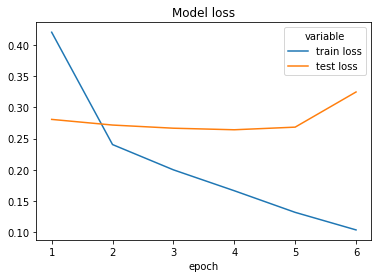

In [ ]:
loss = pd.DataFrame(
    {"train loss": hist.history["loss"], "test loss": hist.history["val_loss"]}
).melt()
loss["epoch"] = loss.groupby("variable").cumcount() + 1
sns.lineplot(x="epoch", y="value", hue="variable", data=loss).set(
    title="Model loss", ylabel=""
)

### A look at learned embeddings

Following, we take a look at the embeddings that our network has learned. The embedding vectors correspond to the weights of the embedding layer. We use them to get the embeddings for the 8k most used words in the comments:

In [137]:
# get trained embeddings
embeddings = model.layers[0].get_weights()[0]
# get token <-> integer dictionary
word_index = tokenizer.word_index.items()
# for each word in dict get embedding
words_embeddings = {w: embeddings[idx] for w, idx in word_index if idx < 8000}
# show embedding vector for the word
words_embeddings.get("arzt")
print(len(words_embeddings.get("arzt")))

100


Using PCA we can reduce the dimensionality of each word's vector from 100 to only two. This enables us to plot the points and learn how their position on the plot and the distances between each other corresponds to their meaning:

In [138]:
# reduce vectors to two dimensions
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
tsne = PCA(n_components=2, random_state=1)
emb_val = list(words_embeddings.values())
emb_name = list(words_embeddings.keys())
X_2d = tsne.fit_transform(emb_val)
pca_df = pd.DataFrame({"X": X_2d[:, 0], "Y": X_2d[:, 1], "word": emb_name})
pca_df.head(3)

,X,Y,word
0,-0.052666,-0.273827,arzt
1,0.393840,0.074682,gut
2,0.209959,-0.184990,dr


<Axes: xlabel='X', ylabel='Y'>

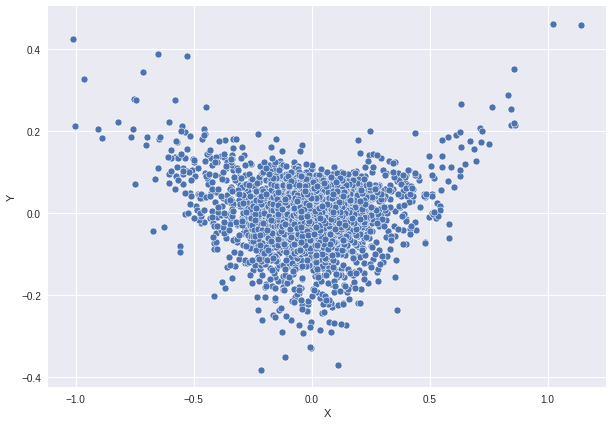

In [139]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=pca_df,x='X',y="Y")

We can also calculate which word vectors are very close to each other by using the `KDTree` algorithm. Then, we look for words that are most similar to "schlecht" (bad):

In [140]:
from sklearn.neighbors import KDTree

tree = KDTree(pca_df[["X", "Y"]])
# get most similar vectors
nearest = tree.query(pca_df.loc[pca_df["word"] == "unfreund", ["X", "Y"]], k=6)
pca_df.iloc[nearest[1][0], :]

,X,Y,word
9,-0.528989,0.382685,unfreund
675,-0.577301,0.275094,fehldiagnos
311,-0.650322,0.387078,wed
204,-0.446050,0.257710,gewartet
287,-0.550314,0.212801,uberfordert
237,-0.605977,0.222625,enttauscht


In [145]:
# get most similar vectors
nearest = tree.query(pca_df.loc[pca_df["word"] == "nett", ["X", "Y"]], k=6)
pca_df.iloc[nearest[1][0], :]

,X,Y,word
16,0.628830,0.088819,nett
369,0.628387,0.105024,froh
212,0.648259,0.119887,stet
132,0.603416,0.062062,verstand
215,0.591453,0.110800,endlich
228,0.578291,0.077115,bish


### Evaluation

Finally, we're excited to see how well our model performs. 

In [141]:
# Load best model from Checkpoint
# model = load_model(PATH_CHECKPOINTS+"lstm-no-embed/Model_300emb_06_0.0757.h5",
#                    compile=False)
# Predict on test data
pred = model.predict(X_test_vec)
pred_class = (pred > 0.5).astype(int)
pred_len = X_test_vec.shape[0]

157/157 [==============================] - 1s 3ms/step


In [142]:
report = metrics.classification_report(Y_test, pred_class[0:pred_len])
print(report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2492
           1       0.91      0.87      0.89      2508

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



The LSTM model has a comparable performance to other traditional models,but it performs less than logistic regression (f1-score = 0,89 < 0,9)

Let's try LSTM model with Pre-trained embeddings.

### Using Pre-trained embeddings

Instead of creating embeddings from scratch as part of a neural network for a specific task, it is also possible to use pre trained embeddings. These have been generated using huge models and data sets and contain large dictionaries. Usually, the vectors of pre trained embeddings capture semantic meaning. For example, two words that are semantic substitues will also have very similar vectors.
Popular choices for embeddings include Word2Vec, GloVe and FastText.  
In my case study , I will use FastText. I could also use the other choices.

In [2]:
!wget "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz"
!gzip -d cc.de.300.vec.gz

--2023-03-27 20:46:46--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.59, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1278030050 (1.2G) [binary/octet-stream]
Saving to: ‘cc.de.300.vec.gz’

cc.de.300.vec.gz    100%[===================>]   1.19G   212MB/s    in 6.5s    

2023-03-27 20:46:53 (188 MB/s) - ‘cc.de.300.vec.gz’ saved [1278030050/1278030050]



An easy way to use the vectors is the [gensim library](https://radimrehurek.com/gensim/):

In [3]:
%%time
# Load Fasttext vector embeddings - takes some time 10min
# use pickle to dump loaded model -> load that = 12s
import smart_open
import gensim
from gensim.models import KeyedVectors

de_model = KeyedVectors.load_word2vec_format('/content/cc.de.300.vec', unicode_errors='ignore')

CPU times: user 6min 50s, sys: 13 s, total: 7min 3s
Wall time: 7min 34s


In [156]:
!pip uninstall smart_open
!pip install smart_open

Found existing installation: smart-open 1.9.0
Uninstalling smart-open-1.9.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/smart_open-1.9.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/smart_open/*
Proceed (Y/n)? Y
  Successfully uninstalled smart-open-1.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)


In [154]:
!pip install gensim==3.4.0
!pip install smart_open==1.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 12.2 MB/s eta 0:00:00
  Created wheel for smart_open: filename=smart_open-1.9.0-py3-none-any.whl size=73093 sha256=8848dfb2f1b5d09baab262b1888a7fc838fc2577cf3f822579662aedca314ed5
  Stored in directory: /root/.cache/pip/wheels/cc/b9/00/26ff8c7601415a2dcd6a1e20ad003c32cda3b720bc3b9c0ead
Successfully built smart_open
  Attempting uninstall: smart_open
    Found existing installati

I've mentioned before that similar words are represented by similar vectors. 
Let's look at the work "arzt" :

In [ ]:
de_model.similar_by_word("arzt")[0:5]


[('hausarzt', 0.8440093994140625),
 ('artzt', 0.8014777302742004),
 ('arzt.', 0.7992661595344543),
 ('kinderarzt', 0.7868670225143433),
 ('frauenarzt', 0.7781710624694824)]

Another astonishing quality of the embeddings is that vector calculations represent semantic relationships. Let's try this out:

In [ ]:
# get vectors for the words
woman = de_model.get_vector("frau")
doctor = de_model.get_vector("arzt")
# calculate and get closest match for resulting vector
de_model.similar_by_vector(doctor + woman)

[('arzt', 0.8891544938087463),
 ('frau', 0.7991741895675659),
 ('frauenarzt', 0.7820956707000732),
 ('hausarzt', 0.7763659954071045),
 ('ärztin', 0.7679202556610107),
 ('frauenärztin', 0.7507506608963013),
 ('arzthelferin', 0.7356253862380981),
 ('kinderärztin', 0.7130227088928223),
 ('hausärztin', 0.7106521129608154),
 ('kinderarzt', 0.7027797698974609)]

Wee add the vector of woman to the vector of doctor. Then, we look for words whose vector is close to the resulting vector. Remarkably, amongst the results we find "ärztin" (female doctor) and "frauenarzt" (gynaecologist)!  


#### Preparing the embeddings

Now, let's see if these properties will help out with our model performance. To get started, we need to assign the correct vector to each of the unique tokens in our comment texts:

In [ ]:
EMBED_DIM =300
# Create embedding matrix
print("preparing embedding matrix...")
words_not_found = []
# all words from the comments
word_index = tokenizer.word_index
# max unique words to keep
nb_words = min(MAX_FEATURES, len(word_index))
# define matrix dimensions
embedding_matrix = np.zeros((nb_words, EMBED_DIM))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    try:
        embedding_vector = de_model.get_vector(word)
    except KeyError:
        embedding_vector = None
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print(f"Null word embeddings: {np.sum(np.sum(embedding_matrix, axis=1) == 0)}")
print(
    f"Some of the words not found:\n"
    f"{' '.join([random.choice(words_not_found) for x in range(0,10)])}"
)

preparing embedding matrix...
Null word embeddings: 8461
Some of the words not found:
wellingsbuttel fursorg troeb heuschnupfenallergi kompetetenz gehub kampnagelfabr wirtschaftsunternehm auswahlbar sepsisgefahr


While the FastText embeddings include a lot of words, some of the words in our comments are still missing. However, its only a small fraction and you can see that those are mostly surnames or very special medical terms. Hence, we can ignore this for now. We can now use this embedding matrix in our neural network. We use it to specify the weights of the embedding layer:

In [ ]:
MAX_FEATURES=15394
# Define NN architecture
with strategy.scope():
    model = Sequential()
    model.add(
        Embedding(
            input_dim=MAX_FEATURES,
            output_dim=EMBED_DIM,
            input_length=MAXLEN,
            weights=[embedding_matrix],
            trainable=False,
        )
    )
    model.add(Dropout(0.3))
    model.add(
        Conv1D(FILTERS, KERNEL_SIZE, padding="valid", activation="relu", strides=1)
    )
    model.add(MaxPooling1D(pool_size=POOL_SIZE))
    model.add(LSTM(LSTM_OUTPUT_SIZE))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.RMSprop(),
        metrics=["accuracy"],
    )

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 40, 300)           4618200   
                                                                 
 dropout_1 (Dropout)         (None, 40, 300)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 64)            96064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 64)            0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 100)               66000     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                      

Because we specified the weights and set `trainable = False` for the embedding layer the model won't need to learn new embeddings but just use the ones we provided. Hence, the number of trainable parameters of the model is greatly reduced compared to our first model.  
That was all we needed to change, so let's fit this new model:

In [ ]:
%%time
# Stop training when validation acc starts dropping
# Save checkpoint of model each period
now = datetime.now().strftime("%Y-%m-%d_%H%M")
# Create callbacks
callbacks = [
    EarlyStopping(monitor="val_loss", verbose=1, patience=2),
    ModelCheckpoint(
        PATH_CHECKPOINTS + now + "_Model_FT-Embed_{epoch:02d}_{val_loss:.4f}.h5",
        monitor="val_loss",
        save_best_only=True,
        verbose=1,
    ),
]

# Fit the model
steps_per_epoch = int(np.floor((len(X_train_vec) / BATCH_SIZE)))
print(
    f"Model Params.\nbatch_size: {BATCH_SIZE}\nEpochs: {EPOCHS}\n"
    f"Step p. Epoch: {steps_per_epoch}\n"
)

hist = model.fit(
    X_train_vec,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    callbacks=callbacks,
    validation_data=(X_test_vec, Y_test),
)

Model Params.
batch_size: 32
Epochs: 10
Step p. Epoch: 468

Epoch 1/10
464/468 [============================>.] - ETA: 0s - loss: 0.4497 - accuracy: 0.7893
Epoch 1: val_loss improved from inf to 0.37332, saving model to /contentmodels/checkpoints/2023-03-26_1926_Model_FT-Embed_01_0.3733.h5
468/468 [==============================] - 13s 14ms/step - loss: 0.4496 - accuracy: 0.7896 - val_loss: 0.3733 - val_accuracy: 0.8346
Epoch 2/10
467/468 [============================>.] - ETA: 0s - loss: 0.3546 - accuracy: 0.8509
Epoch 2: val_loss improved from 0.37332 to 0.35979, saving model to /contentmodels/checkpoints/2023-03-26_1926_Model_FT-Embed_02_0.3598.h5
468/468 [==============================] - 3s 7ms/step - loss: 0.3545 - accuracy: 0.8511 - val_loss: 0.3598 - val_accuracy: 0.8464
Epoch 3/10
464/468 [============================>.] - ETA: 0s - loss: 0.3264 - accuracy: 0.8647
Epoch 3: val_loss improved from 0.35979 to 0.35547, saving model to /contentmodels/checkpoints/2023-03-26_1926_Mod

We can now check the prediction results:

In [ ]:
# Predict on test data
pred = model.predict(X_test_vec)
pred_class = (pred > 0.5).astype(int)
pred_len = X_test_vec.shape[0]

157/157 [==============================] - 1s 3ms/step


In [ ]:
report = metrics.classification_report(Y_test, pred_class[0:pred_len])
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2492
           1       0.86      0.85      0.86      2508

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



The resulting model performs significantly worse than the original LSTM neural network and other models.

Now we specified the weights and set `trainable = True` for the embedding layer the model will  learn new embeddings for our specific tasks.

In [ ]:
# Define NN architecture
with strategy.scope():
    model = Sequential()
    model.add(
        Embedding(
            input_dim=MAX_FEATURES,
            output_dim=EMBED_DIM,
            input_length=MAXLEN,
            weights=[embedding_matrix],
            trainable=True,
        )
    )
    model.add(Dropout(0.3))
    model.add(
        Conv1D(FILTERS, KERNEL_SIZE, padding="valid", activation="relu", strides=1)
    )
    model.add(MaxPooling1D(pool_size=POOL_SIZE))
    model.add(LSTM(LSTM_OUTPUT_SIZE))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.RMSprop(),
        metrics=["accuracy"],
    )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 300)           4618200   
                                                                 
 dropout_2 (Dropout)         (None, 40, 300)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 64)            96064     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 9, 64)            0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 100)               66000     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                      

In [ ]:
%%time
# Stop training when validation acc starts dropping
# Save checkpoint of model each period
now = datetime.now().strftime("%Y-%m-%d_%H%M")
# Create callbacks
callbacks = [
    EarlyStopping(monitor="val_loss", verbose=1, patience=2),
    ModelCheckpoint(
        PATH_CHECKPOINTS
        + now
        + "_Model_FT-Embed-trainable_{epoch:02d}_{val_loss:.4f}.h5",
        monitor="val_loss",
        save_best_only=True,
        verbose=1,
    ),
]

# Fit the model
steps_per_epoch = int(np.floor((len(X_train_vec) / BATCH_SIZE)))
print(
    f"Model Params.\nbatch_size: {BATCH_SIZE}\nEpochs: {EPOCHS}\n"
    f"Step p. Epoch: {steps_per_epoch}\n"
)

hist = model.fit(
    X_train_vec,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    callbacks=callbacks,
    validation_data=(X_test_vec, Y_test),
)

Model Params.
batch_size: 32
Epochs: 10
Step p. Epoch: 468

Epoch 1/10
464/468 [============================>.] - ETA: 0s - loss: 0.3491 - accuracy: 0.8421
Epoch 1: val_loss improved from inf to 0.28931, saving model to /contentmodels/checkpoints/2023-03-26_1927_Model_FT-Embed-trainable_01_0.2893.h5
468/468 [==============================] - 21s 38ms/step - loss: 0.3483 - accuracy: 0.8425 - val_loss: 0.2893 - val_accuracy: 0.8848
Epoch 2/10
465/468 [============================>.] - ETA: 0s - loss: 0.2311 - accuracy: 0.9146
Epoch 2: val_loss improved from 0.28931 to 0.28124, saving model to /contentmodels/checkpoints/2023-03-26_1927_Model_FT-Embed-trainable_02_0.2812.h5
468/468 [==============================] - 7s 14ms/step - loss: 0.2307 - accuracy: 0.9148 - val_loss: 0.2812 - val_accuracy: 0.8958
Epoch 3/10
467/468 [============================>.] - ETA: 0s - loss: 0.1880 - accuracy: 0.9315
Epoch 3: val_loss improved from 0.28124 to 0.25930, saving model to /contentmodels/checkpoint

In [ ]:
# Predict on test data
pred = model.predict(X_test_vec)
pred_class = (pred > 0.5).astype(int)
pred_len = X_test_vec.shape[0]
# Show prediction metrics
report = metrics.classification_report(Y_test, pred_class[0:pred_len])
print(report)

157/157 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2492
           1       0.88      0.92      0.90      2508

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



This model performs way better than the previous one and the original LSTM in terms of f1-score. It has a macro f1-score of 0.90.

 ### Transformer-based models (Bert)

BERT comes with its own Tokenizer. As with the model itself, we will use a pre trained version of the tokenizer. Here, we use a variant that has been specifically trained on German texts and made public. Hence, it already comes with a huge German vocabulary:

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 28.2 MB/s eta 0:00:00


In [ ]:
# this will download and initialize the pre trained tokenizer
from transformers import BertTokenizer, TFBertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-german-cased")

The inputs expected by BERT are very similar to the ones we've used before: they are just vectors containing integers which can be mapped to tokens by using a dictionary. The only difference is that BERT expects several "special" tokens. `[CLS]` stands for classification and marks the beginning of a new input to be classified. `[SEP]` marks the separation between sentences. Finally, `[PAD]` is used as a placeholder in order to pad all vectors to the same fixed length. The helper method `encode_plus` of the `Tokenizer` object deals with creating the numeric vectors while taking care of the extra tokens: 

In [ ]:
MAXLEN = 192

def preprocess_text(data):
    """ take texts and prepare as input features for BERT 
    """
    input_ids = []
    # For every sentence...
    for comment in data:
        encoded_sent = tokenizer.encode_plus(
            text=comment,
            add_special_tokens=True,  # Add `[CLS]` and `[SEP]`
            max_length=MAXLEN,  # Max length to truncate/pad
            pad_to_max_length=True,  # Pad sentence to max length
            return_attention_mask=False,  # attention mask not needed for our task
        )
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get("input_ids"))
    return input_ids

Before creating our features, let's check out the workings of the tokenizer with an example:

In [ ]:
# Original Comment and encoding outputs
comment = ["Ich liebe data-dive.com und meine Katze."]
input_ids = preprocess_text(comment)
print("Comment: ", comment)
print("Tokenized Comment: ", tokenizer.convert_ids_to_tokens(input_ids[0])[0:20])
print("Token IDs: ", input_ids[0][0:20])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Comment:  ['Ich liebe data-dive.com und meine Katze.']
Tokenized Comment:  ['[CLS]', 'Ich', 'liebe', 'dat', '##a', '-', 'di', '##ve', '.', 'c', '##om', 'und', 'meine', 'Katze', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Token IDs:  [3, 1671, 16619, 10453, 26903, 26935, 4616, 2304, 26914, 1350, 101, 42, 6667, 25285, 26914, 4, 0, 0, 0, 0]


In [ ]:
# Create binary grade, class 1-2 or 5-6  = good or bad
df_transform["grade_bad"] = 0
df_transform.loc[df_transform["rating"] == 'positive', "grade_bad"] = 1
df_transform.loc[df_transform["rating"] == 'negative', "grade_bad"] = 0

In [ ]:
df_transform = pd.read_csv('/content/reviews.csv',  delimiter=';',encoding='utf-8')

df_transform ["input_id "] = df_data["comment"].map(
    lambda x: preprocess_text(x) if isinstance(x, str) else x
)
df_transform.head(5)
# input_ids = pickle.load(open(PATH_GDRIVE_TMP+"/input_ids.pkl", "rb"))

rating  \
0  positive   
1  negative   
2  negative   
3  negative   
4  negative   

                                                                                                                                                                                                                                                                         comment  \
0                                                                                                  Ich liebe Herrn Dr. Scheeser er nimmt dich immer Zeit für seine Patienten und ist sehr geduldig. Auch seine Sprechstundenhilfe ist total lieb! Kann ich nur weiter empfehlen!   
1                                                                                                     Die Behandlungen von Dr. Brede dauern im Schnitt ca. 5-7 Minuten. Beschwerden werden nach meiner Erfahrung nicht für ernst genommen. Seine Art ist unverbindlich und kühl.   
2  Hilfe bei Zahnschmerzen. <br />\r\nNicht diesen Zahnarzt aufsuchen. Lediglich die Mitteilung sie waren 6 Jahre nicht bei uns und jetzt wollen sie uns besuchen. Trotz Hinweis, dass ich warten würde.<br />\r\nSchlechtester Service, den ich jemals beim Arzt erfahren habe.   
3                                                                                                                                                                                                     Ich bin unzufrieden und kann Frau Dr. Frankenberger nicht weiterempfehlen.   
4                                                                                                                                                                          Der arzt ist okay,aber es ist für mich offensichtlich,dass er seine arbeit nicht außerordentlich mag.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
input_ids = preprocess_text(df_transform["comment"])

Next, we split out data into train and test for cross validation:

In [ ]:
# Sample data for cross validation
train_ids, test_ids, train_labels, test_labels = train_test_split(
    input_ids, df_transform["grade_bad"], random_state=1, test_size=0.25, shuffle=True
)
print(f"Train set: {len(train_ids)}\nTest set: {len(test_ids)}")

Train set: 15000
Test set: 5000


In [ ]:
# Set Model Parameters
MAXLEN = MAXLEN
BATCH_SIZE_PER_REPLICA = 16
BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync
EPOCHS = 8
LEARNING_RATE = 1e-5
DATA_LENGTH = len(df_transform)

In [ ]:
def create_dataset(
    data_tuple,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    buffer_size=DATA_LENGTH,
    train=False,
):
    dataset = tf.data.Dataset.from_tensor_slices(data_tuple)
    if train:
        dataset = dataset.shuffle(
            buffer_size=buffer_size, reshuffle_each_iteration=True
        ).repeat(epochs)
    dataset = dataset.batch(batch_size)
    return dataset

train = create_dataset(
    (train_ids, train_labels), buffer_size=len(train_ids), train=True
)
test = create_dataset((test_ids, test_labels), buffer_size=len(test_ids))

In [ ]:
def build_model(transformer, max_len=MAXLEN):
    """ add binary classification to pretrained model
    """
    input_word_ids = tf.keras.layers.Input(
        shape=(max_len,), dtype=tf.int32, name="input_word_ids"
    )
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = tf.keras.layers.Dense(1, activation="sigmoid")(cls_token)
    model = tf.keras.models.Model(inputs=input_word_ids, outputs=out)
    model.compile(
        tf.keras.optimizers.Adam(lr=LEARNING_RATE),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [ ]:
with strategy.scope():
    transformer_layers = TFBertModel.from_pretrained("bert-base-german-cased")
    model = build_model(transformer_layers, max_len=MAXLEN)
model.summary()

Some layers from the model checkpoint at bert-base-german-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-german-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 192)]            0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  109081344
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             192, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

In the first step, we define an `Input` layer which expects our numeric vectors as input. Then, we add the pre trained transformer which receives the inputs from the previous layer. The output of the transformer is then fed into a `Dense` layer which finally outputs a probability for our input belonging to class 0 or 1.  
Now, we build our model by first downloading the pre trained BERT and passing it to our `build_model` function:

In [ ]:
# Stop training when validation acc starts dropping
# Save checkpoint of model each period
now = datetime.now().strftime("%Y-%m-%d_%H%M")
# Create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", verbose=1, patience=1, restore_best_weights=True
    ),
    # tf.keras.callbacks.ModelCheckpoint(
    #    PATH_GDRIVE_TMP + now + "_Model_{epoch:02d}_{val_loss:.4f}.h5",
    #    monitor="val_loss",
    #    save_best_only=True,
    #    verbose=1,
    # ),
]


In [ ]:
# Stop training when validation acc starts dropping
# Save checkpoint of model each period
now = datetime.now().strftime("%Y-%m-%d_%H%M")
# Create callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", verbose=1, patience=1, restore_best_weights=True
    ),
    # tf.keras.callbacks.ModelCheckpoint(
    #    PATH_GDRIVE_TMP + now + "_Model_{epoch:02d}_{val_loss:.4f}.h5",
    #    monitor="val_loss",
    #    save_best_only=True,
    #    verbose=1,
    # ),
]

In [ ]:
%%time
# Train using appropriate steps per epochs (go through all train data in an epoch)
steps_per_epoch = int(np.floor((len(train_ids) / BATCH_SIZE)))
print(
    f"Model Params:\nbatch_size: {BATCH_SIZE}\nEpochs: {EPOCHS}\n"
    f"Step p. Epoch: {steps_per_epoch}\n"
    f"Learning rate: {LEARNING_RATE}"
)
hist = model.fit(
    train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=test,
    verbose=1,
    callbacks=callbacks,
)

Model Params:
batch_size: 16
Epochs: 8
Step p. Epoch: 937
Learning rate: 1e-05
Epoch 1/8


937/937 [==============================] - 737s 712ms/step - loss: 0.7533 - accuracy: 0.4947 - val_loss: 0.7133 - val_accuracy: 0.4928
Epoch 2/8
937/937 [==============================] - 662s 707ms/step - loss: 0.7014 - accuracy: 0.5075 - val_loss: 0.6933 - val_accuracy: 0.5072
Epoch 3/8
638/937 [===================>..........] - ETA: 3:09 - loss: 0.6983 - accuracy: 0.5040

In [ ]:
loss = pd.DataFrame(
    {"train loss": hist.history["loss"], "test loss": hist.history["val_loss"]}
).melt()
loss["epoch"] = loss.groupby("variable").cumcount() + 1
sns.lineplot(x="epoch", y="value", hue="variable", data=loss).set(
    title="Model loss",
    ylabel="",
    xticks=range(1, loss["epoch"].max() + 1),
    xticklabels=loss["epoch"].unique(),
)

In [ ]:
pred = model.predict(test, batch_size=BATCH_SIZE, verbose=2, use_multiprocessing=True)


In [ ]:
# Load best model from Checkpoint
# model = load_model(PATH_GDRIVE_TMP+"BERT.h5", compile=False)
pred_class = (pred > 0.5).astype(int)
report = metrics.classification_report(test_labels, pred_class)
print(report)

Unfortunately , I was unable to run BERT transformers due to lack of GPU resources. Other models could be a solution to our case study such as:GermanGPT2, XLM-RoBERTa, flair models...

### Conclusion
Using the traditional methods, LogisticRegression is a promising model with macro f1-score = 0.9. The LSTM model which uses a pretrained embedding has also the same performance with macro f1-score = 0.9. Unfortunately, I was unable to run the transformers due to lack of resources (GPU).


These results could be of course better by eliminating other words such as "doctor" (arzt) and "miss" (frau) which are very common but probably won't help our algorithm to differentiate between sentiments. 